# Project: Wrangling and Analyze Data

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 
import os
import seaborn as sns

## Data Gathering


In [2]:
# read data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


In [3]:
# Make directory if it does not already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Image prediction

In [4]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )


# Twitter API

In [5]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
#For loop which will add each available tweet to a new line of tweet-json.txt
with open('tweet_json.txt','a', encoding= 'utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [7]:
twitter_list = []

#Read the .txt file line by line into a list of dictionaries
for line in open('tweet_json.txt', 'r'):
    twitter_data =json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'], 'retweet_count': twitter_data['retweet_count'], 'favorite_count': twitter_data['favorite_count'], 'followers_count': twitter_data['user']['followers_count']})



In [8]:
# Convert the list of dictionaries to a pandas DataFrame
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count','followers_count'])

## Assessing Data




In [9]:
twitter_data.head(5)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [10]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [11]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
image_prediction.duplicated().sum()

0

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [15]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
Bailey        7
Daisy         7
Toby          7
an            7
Oscar         6
Milo          6
Jack          6
Rusty         6
Stanley       6
Jax           6
Scout         6
Dave          6
Leo           6
Bella         6
Koda          6
very          5
           ... 
Odin          1
Kendall       1
Jonah         1
Kanu          1
Zuzu          1
Pete          1
Leonard       1
Ralphie       1
Sweets        1
Teddy         1
Beya          1
Kuyu          1
Josep         1
Willow        1
life          1
Gin           1
Horace        1
Leonidas      1
Cheryl        1
Willy         1
Hanz          1
Ben           1
Vince         1
Coleman       1
Lili          1
Jockson       1
Grizz         1
Jett          1
Norman        1
Anthony       1
Name: name, Length: 957,

In [19]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


# Quality issues

1.Keep original ratings (no retweets) that have images

2.Delete columns that won't be used for analysis in archive_clean table

3.Erroneous datatypes

4.Correct numerators with decimals

5.Error in dog names are not a dog's name

6.Source column is in HTML-formatted string, not a normal string

7.Text columns includes a text and a short link

8.Missing values


# Tidiness issues
1.Twitter api table columns(retweet_count, favorite_count, follower_count) and image predictions table should be added to twitter archive table

2. Then dropping tweets with no images

3. The issue four dog stage columns should be combined into a single column

## Cleaning Data
In this section, we will clean **all** of the issues we documented while assessing. 


In [23]:
# Making copies of original pieces of data
archive_clean = twitter_archive.copy()
image_clean = image_prediction.copy()
twitterapi_clean = twitter_data.copy()


In [24]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Define:
Keep original ratings (no retweets) that have images

#### Code

In [25]:
# Deleting retweets
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]

#### Test

In [26]:
print(sum(archive_clean.retweeted_status_user_id.value_counts()))

0


#### Define
Drop columns not needed for our analysis

#### Code

In [27]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],1)

#### Test

In [28]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


#### Define
Erroneous datatypes fix

#### Code

In [29]:
# Convert tweet_id to str
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
twitterapi_clean.tweet_id = archive_clean.tweet_id.astype(str)

# convert timestamp to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

# convert source to category datatype
archive_clean.source = archive_clean.source.astype("category")


#### Test

In [30]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null category
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 269.2+ KB


#### Define
Correct numerators with decimals

#### Code

In [31]:
# check to see if some columns were not extracted properly to capture decimals
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text','rating_numerator','rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


#### Define
Incorrect dog names

In [32]:
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

#### Code

In [33]:
archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [34]:
archive_clean.name.value_counts()

None        784
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Lola          8
Sadie         8
Winston       8
Daisy         7
Toby          7
Jax           6
Bo            6
Bailey        6
Bella         6
Stanley       6
Oscar         6
Koda          6
Chester       5
Bentley       5
Louis         5
Dave          5
Scout         5
Milo          5
Rusty         5
Buddy         5
Leo           5
Chip          4
Maggie        4
           ... 
Kody          1
Jiminus       1
Daniel        1
Superpup      1
Aldrick       1
Sweets        1
Leonidas      1
Horace        1
Liam          1
Adele         1
Ito           1
Brat          1
Tess          1
Monty         1
Logan         1
Grizzie       1
Chaz          1
Schnozz       1
Cedrick       1
Gin           1
Major         1
Ralphie       1
Teddy         1
Harlso        1
Kuyu          1
Josep         1
Willow        1
Raphael       1
Beya          1
Anthony       1
Name: name, Length: 931,

#### Define
Source columns is in HTML-fotmatted string not a normal string

#### Code

In [35]:
# Extract values
archive_clean.source = archive_clean.source.str.extract('>([\w\W\s]*)<',expand=True)

#### Test

In [36]:
archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define
Removes hyperlinks in tweets

#### Code

In [37]:
# define function and apply to archive_clean table
def htmlink(x):
    http_pos = x.find("http")
    if http_pos == -1:
        x = x
    else:
        x = x[:http_pos - 1]
    return x

archive_clean.text = archive_clean.text.apply(htmlink)

#### Test

In [38]:
for row in archive_clean.text[:10]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
This is Zoey. She doesn't want to be one of the scary shark

#### Define
Effected rows did not extract properly, fixing it



#### Code

In [42]:
#First change numerator and denominators type int to float to allow decimals 

rating = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
archive_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
archive_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

#Update numerators

archive_clean.loc[(archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive_clean.loc[(archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
archive_clean.loc[(archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
archive_clean.loc[(archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#### Test

In [43]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26,10.0


## Tidiness

#### Define
Lets move twitter api table and image prediction table to twitter archive table

#### Code

In [44]:
# merge the two tables
archive_clean = pd.merge(left=archive_clean, right=twitterapi_clean, how='left', on='tweet_id')
archive_clean = pd.merge(left=archive_clean, right=image_clean, how='left', on='tweet_id')                         

#### Test

In [45]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 25 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
retweet_count         2173 non-null float64
favorite_count        2173 non-null float64
followers_count       2173 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf           

#### Define
drop tweets with no image

#### Code

In [46]:
archive_clean.dropna(axis = 0, inplace = True)

#### Test

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2172
Data columns (total 25 columns):
tweet_id              1992 non-null object
timestamp             1992 non-null datetime64[ns]
source                1992 non-null object
text                  1992 non-null object
rating_numerator      1992 non-null float64
rating_denominator    1992 non-null float64
name                  1992 non-null object
doggo                 1992 non-null object
floofer               1992 non-null object
pupper                1992 non-null object
puppo                 1992 non-null object
retweet_count         1992 non-null float64
favorite_count        1992 non-null float64
followers_count       1992 non-null float64
jpg_url               1992 non-null object
img_num               1992 non-null float64
p1                    1992 non-null object
p1_conf               1992 non-null float64
p1_dog                1992 non-null object
p2                    1992 non-null object
p2_conf           

#### Define
To clean this issue four dog stage columns should be combined into a single column

#### Code

In [50]:
# First replace None in stage columns with empty string as follows.
archive_clean.doggo.replace('None', '', inplace=True)  
archive_clean.floofer.replace('None', '', inplace=True)  
archive_clean.pupper.replace('None', '', inplace=True)  
archive_clean.puppo.replace('None', '', inplace=True)  


# Then combine stage columns.
archive_clean['stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.

archive_clean.loc[archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
archive_clean.loc[archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
archive_clean.loc[archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

#### Test

In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2172
Data columns (total 26 columns):
tweet_id              1992 non-null object
timestamp             1992 non-null datetime64[ns]
source                1992 non-null object
text                  1992 non-null object
rating_numerator      1992 non-null float64
rating_denominator    1992 non-null float64
name                  1992 non-null object
doggo                 1992 non-null object
floofer               1992 non-null object
pupper                1992 non-null object
puppo                 1992 non-null object
retweet_count         1992 non-null float64
favorite_count        1992 non-null float64
followers_count       1992 non-null float64
jpg_url               1992 non-null object
img_num               1992 non-null float64
p1                    1992 non-null object
p1_conf               1992 non-null float64
p1_dog                1992 non-null object
p2                    1992 non-null object
p2_conf           

## Storing Cleaned Data


In [52]:
archive_clean.to_csv('twitter_archive_master.csv',index=False)

## Analysis and Visualization


In [53]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [54]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 26 columns):
tweet_id              1992 non-null int64
timestamp             1992 non-null object
source                1992 non-null object
text                  1992 non-null object
rating_numerator      1992 non-null float64
rating_denominator    1992 non-null float64
name                  1992 non-null object
doggo                 74 non-null object
floofer               8 non-null object
pupper                212 non-null object
puppo                 23 non-null object
retweet_count         1992 non-null float64
favorite_count        1992 non-null float64
followers_count       1992 non-null float64
jpg_url               1992 non-null object
img_num               1992 non-null float64
p1                    1992 non-null object
p1_conf               1992 non-null float64
p1_dog                1992 non-null bool
p2                    1992 non-null object
p2_conf               1992 non-null f

In [55]:
# change types
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)

twitter_archive_master[['rating_numerator', 'rating_denominator']] = twitter_archive_master[['rating_numerator', 'rating_denominator']].astype(float)
twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']] = twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']].astype(int)
twitter_archive_master.source = twitter_archive_master.source.astype("category")
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)



In [56]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 26 columns):
tweet_id              1992 non-null object
timestamp             1992 non-null datetime64[ns]
source                1992 non-null category
text                  1992 non-null object
rating_numerator      1992 non-null float64
rating_denominator    1992 non-null float64
name                  1992 non-null object
doggo                 74 non-null object
floofer               8 non-null object
pupper                212 non-null object
puppo                 23 non-null object
retweet_count         1992 non-null int64
favorite_count        1992 non-null int64
followers_count       1992 non-null int64
jpg_url               1992 non-null object
img_num               1992 non-null float64
p1                    1992 non-null object
p1_conf               1992 non-null float64
p1_dog                1992 non-null bool
p2                    1992 non-null object
p2_conf               1992 non-n

####  V 1. Most used Twitter source

In [57]:
source = twitter_archive_master['source'].value_counts()
source

Twitter for iPhone    1953
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

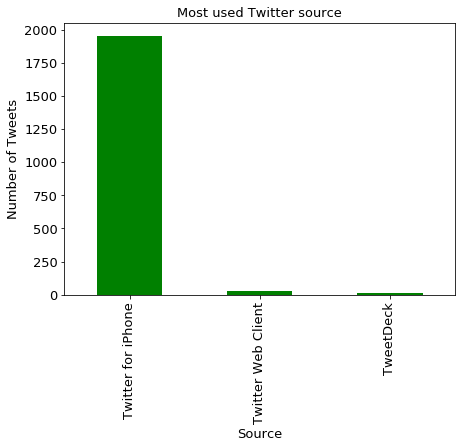

In [58]:
# plot
g_bar = source.plot.bar(color = 'green', fontsize = 13)

g_bar.figure.set_size_inches(7, 5);

plt.title('Most used Twitter source', color = 'black', fontsize = 13)
plt.xlabel('Source', color ='black', fontsize = 13)
plt.ylabel('Number of Tweets', color ='black', fontsize = 13);


#### V 2. WeRateDogs retweet over time

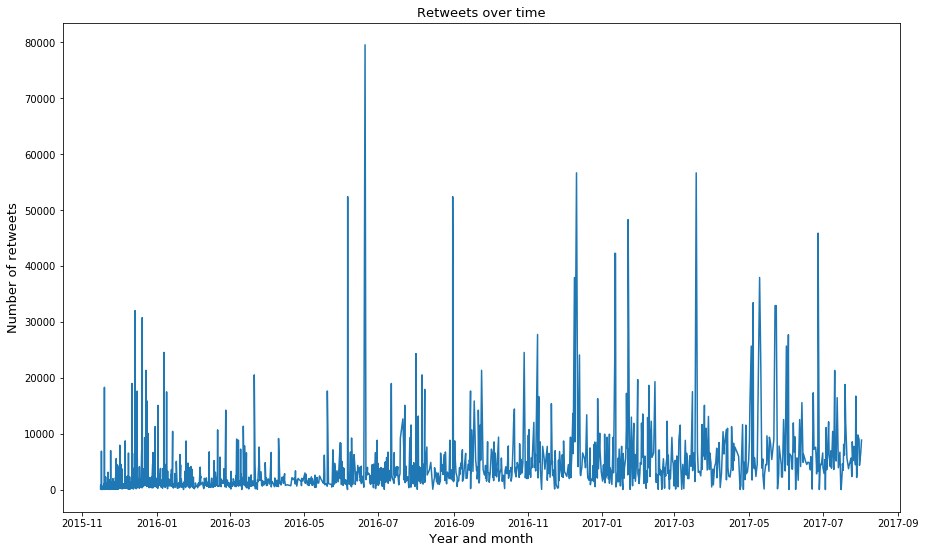

In [59]:
# Plot
sns.set_context()
plt.subplots(figsize = (15, 9))
plt.plot(twitter_archive_master.timestamp, twitter_archive_master.retweet_count)
plt.title('Retweets over time', color = 'black', fontsize = 13)
plt.xlabel('Year and month', color ='black', fontsize = 13)
plt.ylabel('Number of retweets', color ='black', fontsize = 13);


#### V 3. Most popular dog name 

In [60]:
pname = twitter_archive_master.name.value_counts()[1:10]

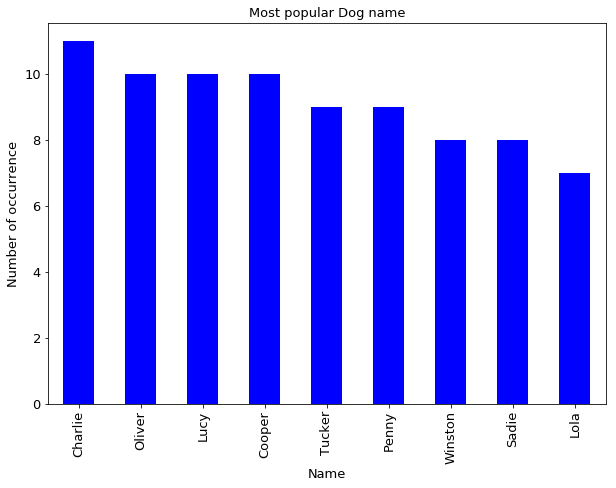

In [61]:
# Plot
g_bar = pname.plot.bar(color = 'blue', fontsize = 13)

g_bar.figure.set_size_inches(10, 7);

plt.title('Most popular Dog name', color = 'black', fontsize = 13)
plt.xlabel('Name', color ='black', fontsize = 13)
plt.ylabel('Number of occurrence', color ='black', fontsize = 13);



Charlie is the most popular dog name, 12

#### V 4.Is there correlation between Favorite and Retweet ?

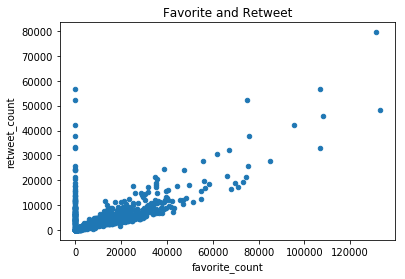

In [62]:
twitter_archive_master.plot(x = 'favorite_count', y = 'retweet_count', kind = 'scatter', title = 'Favorite and Retweet');

In [63]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.71207712369489995

The scotter plot shows that there is positive correlation between favorite and retweet